1. Data Loading & Inspection

In [3]:
import pandas as pd

df = pd.read_csv('wildlife_population.csv')
print(df.head())
print(df.info())
print(df.describe())


            Species         Region  Year  Population
0  African Elephant         Africa  2000        7933
1  African Elephant  South America  2001        7815
2  African Elephant  South America  2002        7955
3  African Elephant         Africa  2003        8423
4  African Elephant           Asia  2004        9165
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Species     120 non-null    object
 1   Region      120 non-null    object
 2   Year        120 non-null    int64 
 3   Population  120 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ KB
None
              Year    Population
count   120.000000    120.000000
mean   2011.500000   7793.016667
std       6.951211   1888.090218
min    2000.000000   5184.000000
25%    2005.750000   6331.750000
50%    2011.500000   7257.000000
75%    2017.250000   9090.000000
max    2023.000000 

 2. Data Cleaning & Preprocessing

In [4]:
df.drop_duplicates(inplace=True)
df['Species'] = df['Species'].str.strip().str.title()
df['Region'] = df['Region'].str.strip().str.title()


 Outlier Detection:

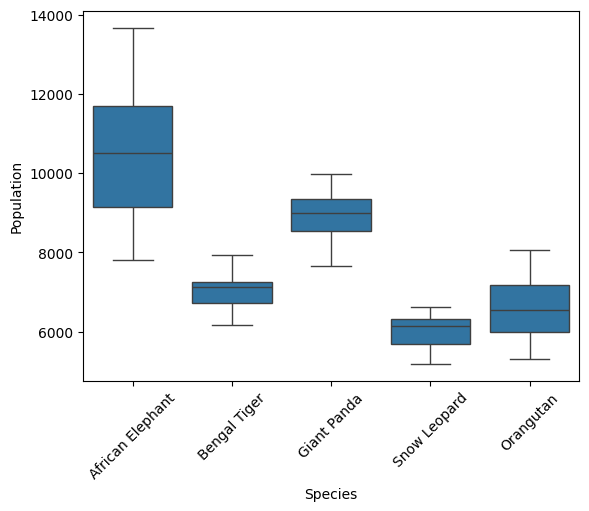

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Species', y='Population')
plt.xticks(rotation=45)
plt.show()


 Encoding & Scaling:

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df['Species_encoded'] = LabelEncoder().fit_transform(df['Species'])
df['Region_encoded'] = LabelEncoder().fit_transform(df['Region'])

scaler = MinMaxScaler()
df['Population_scaled'] = scaler.fit_transform(df[['Population']])


3. Exploratory Data Analysis (EDA)
 Line Plot by Species:

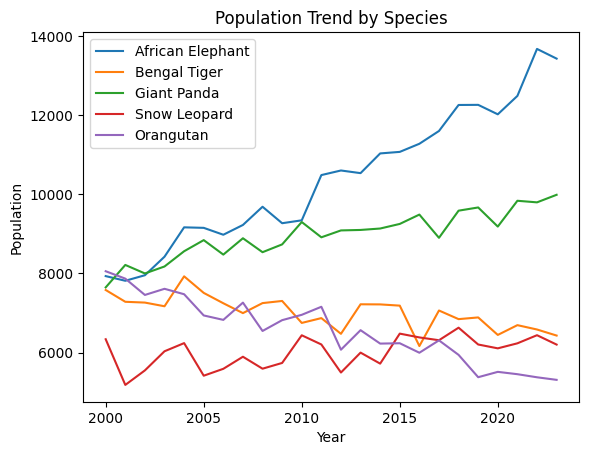

In [7]:
import matplotlib.pyplot as plt

for species in df['Species'].unique():
    species_df = df[df['Species'] == species]
    plt.plot(species_df['Year'], species_df['Population'], label=species)

plt.legend()
plt.title("Population Trend by Species")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()


Regional Population Trends:

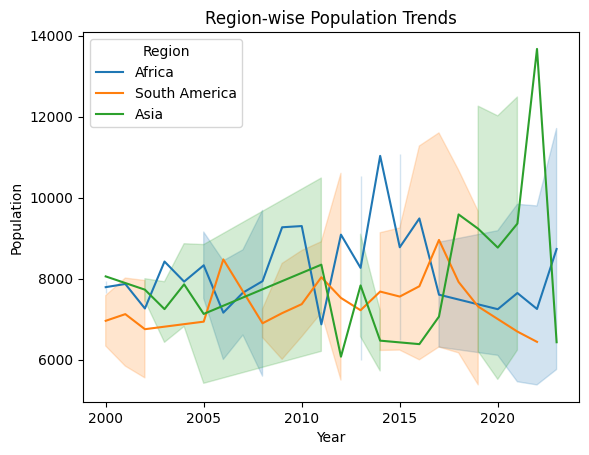

In [8]:
sns.lineplot(data=df, x='Year', y='Population', hue='Region')
plt.title("Region-wise Population Trends")
plt.show()


4. Machine Learning Models Linear Regression:

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Year', 'Species_encoded', 'Region_encoded']]
y = df['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred))


R2: -1.9781748816348323


 Random Forest:

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Plot Predictions:

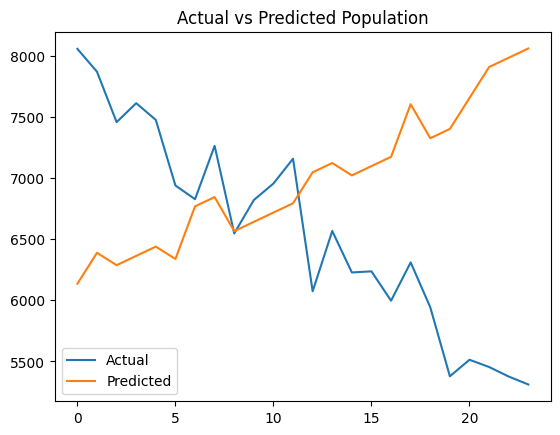

In [11]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Population")
plt.show()


 5. LSTM Time Series Forecasting
 6.  Prepare Time-Series Data:

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Filter data for a species (e.g., the one with the most data points)
top_species = df['Species'].value_counts().idxmax()
species_df = df[df['Species'] == top_species].sort_values('Year')
population_series = species_df['Population'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
pop_scaled = scaler.fit_transform(population_series)

# Prepare sequences
seq_len = 5
X_seq, y_seq = [], []
for i in range(len(pop_scaled) - seq_len):
    X_seq.append(pop_scaled[i:i+seq_len])
    y_seq.append(pop_scaled[i+seq_len])

X_seq = np.array(X_seq).reshape(-1, seq_len, 1)
y_seq = np.array(y_seq)


 Build LSTM Model:

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential([
    Input(shape=(seq_len, 1)),
    LSTM(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_seq, y_seq, epochs=50)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3392
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3305
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3219
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.3133
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3050
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2970
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2892
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2815
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2737
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2659
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2583
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2507
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2430
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2354
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2278
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

 Predict Future:

In [31]:
future = model.predict(last_known_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



## Visualizing Predictions for Each Species 

Now that we’ve trained a Random Forest model, we’ll visualize the predictions for each species and save the plots to files. This helps us analyze how well the model performs for each individual species.


In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def plot_predictions_per_species(model, df, encoder_species, encoder_region):
    species_list = df['Species'].unique()

    for species in species_list:
        species_df = df[df['Species'] == species].copy()
        species_df.sort_values('Year', inplace=True)

        if len(species_df) < 5:
            continue  # Skip species with very few data points

        species_df['Species_encoded'] = encoder_species.transform(species_df['Species'])
        species_df['Region_encoded'] = encoder_region.transform(species_df['Region'])

        X = species_df[['Year', 'Species_encoded', 'Region_encoded']]
        y = species_df['Population']

        split_index = int(0.8 * len(species_df))
        X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
        y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        years = species_df['Year'].iloc[split_index:]

        plt.figure(figsize=(8, 4))
        plt.plot(years, y_test.values, label='Actual', marker='o')
        plt.plot(years, y_pred, label='Predicted', marker='x')
        plt.title(f"{species} - Population Prediction")
        plt.xlabel("Year")
        plt.ylabel("Population")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


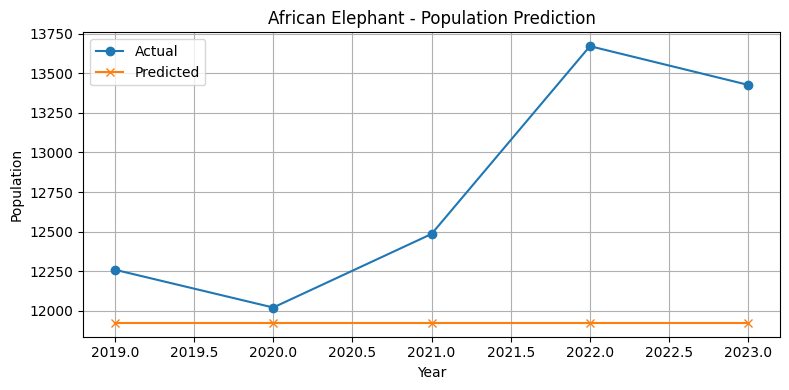

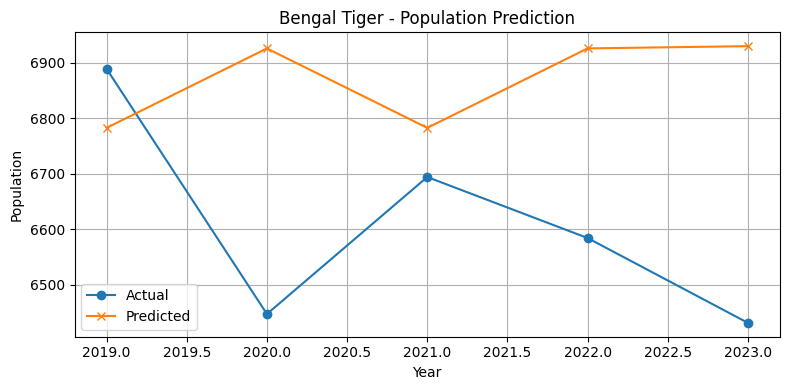

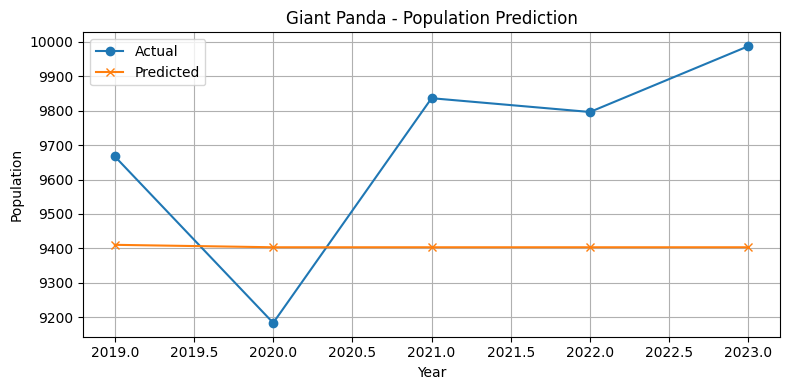

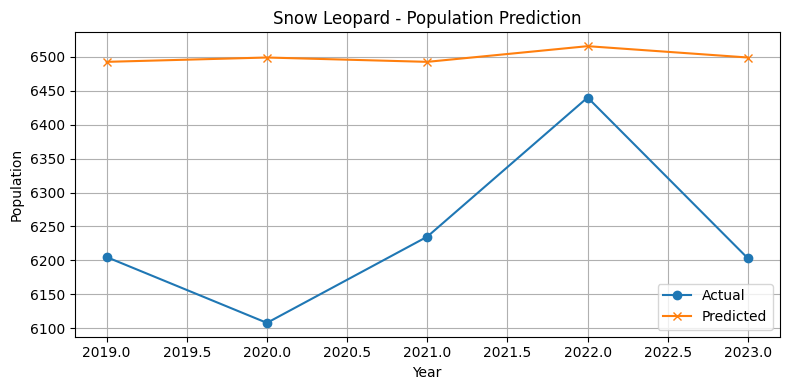

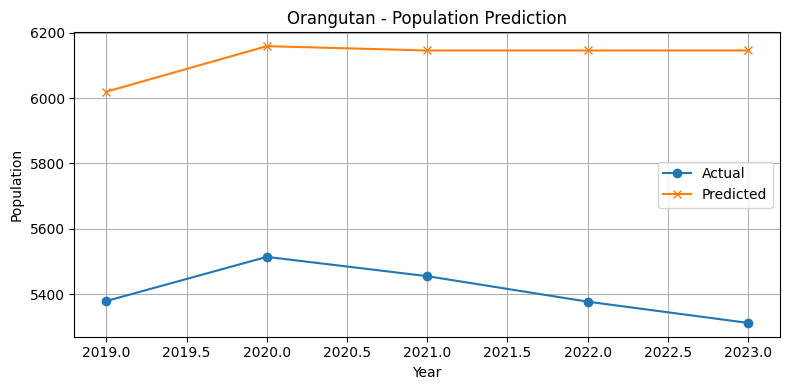

In [34]:

rf = RandomForestRegressor()
le_species = LabelEncoder().fit(df['Species'])
le_region = LabelEncoder().fit(df['Region'])

plot_predictions_per_species(rf, df, le_species, le_region)


In [35]:
# Get the last known sequence from the scaled data
last_known_seq = pop_scaled[-seq_len:].reshape(1, seq_len, 1)

# Predict the next value (normalized)
next_pred_scaled = model.predict(last_known_seq)

# Inverse transform to get the actual population
next_pred_actual = scaler.inverse_transform(next_pred_scaled)

print(f"📈 Predicted next population value: {next_pred_actual[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
📈 Predicted next population value: 13813.83



## LSTM Model for Time-Series Prediction

To capture sequential patterns in population data over time, we use an LSTM (Long Short-Term Memory) neural network. This is especially useful when the data has temporal dependencies.

We will:
- Select a species with the most available data.
- Normalize and reshape the population data into sequences.
- Train an LSTM model to predict future population values.


In [36]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Filter a species with the most records
top_species = df['Species'].value_counts().idxmax()
species_df = df[df['Species'] == top_species].sort_values('Year')
population_series = species_df['Population'].values.reshape(-1, 1)

# Normalize the population data
scaler = MinMaxScaler()
pop_scaled = scaler.fit_transform(population_series)

# Prepare sequences
seq_len = 5
X_seq, y_seq = [], []
for i in range(len(pop_scaled) - seq_len):
    X_seq.append(pop_scaled[i:i+seq_len])
    y_seq.append(pop_scaled[i+seq_len])

X_seq = np.array(X_seq).reshape((-1, seq_len, 1))
y_seq = np.array(y_seq)
last_known_seq = pop_scaled[-seq_len:].reshape(1, seq_len, 1)


##  Future Forecasting with LSTM (Next 10 Years)

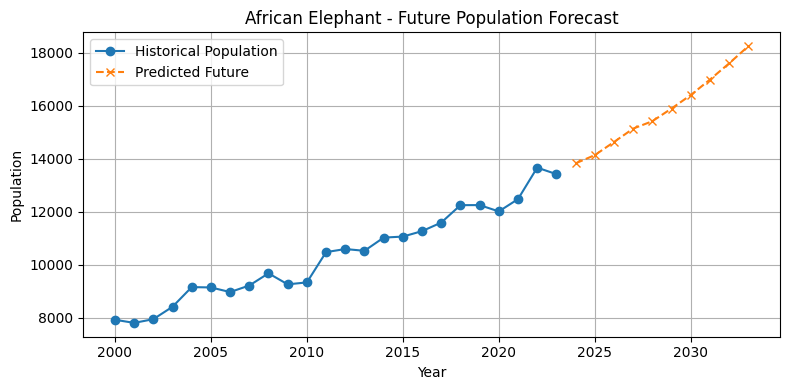

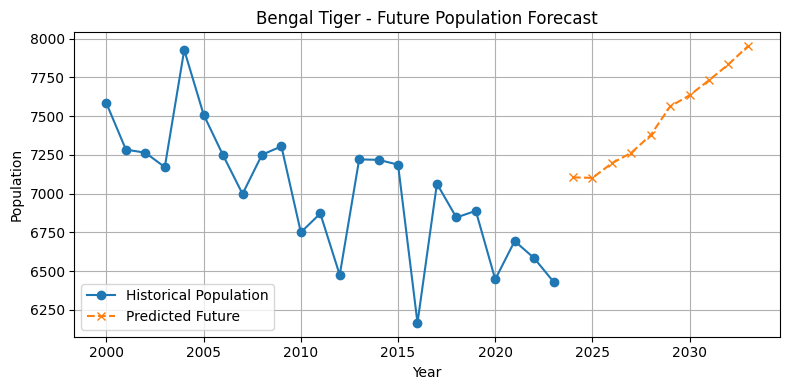

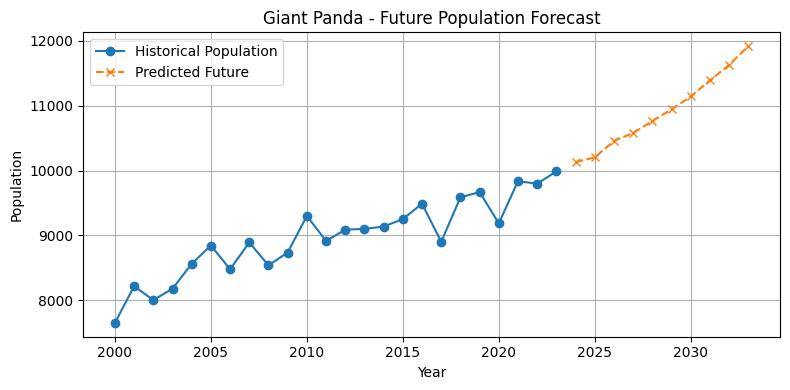

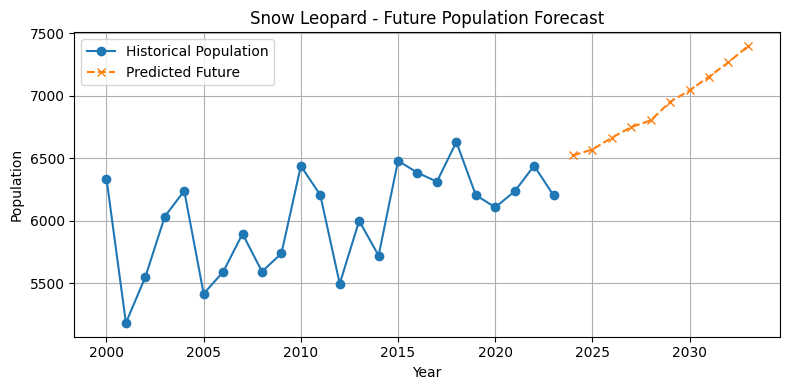

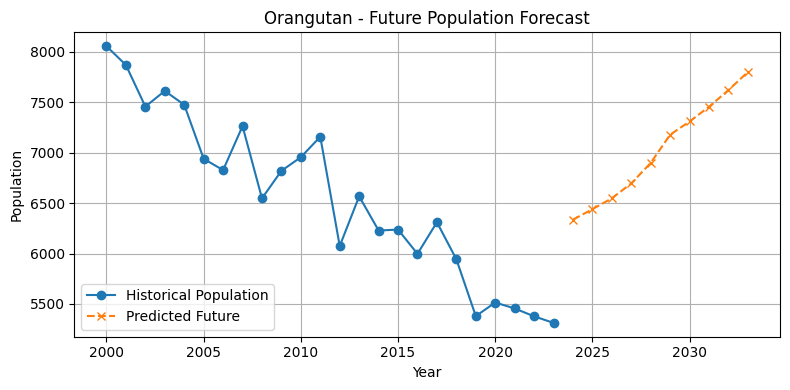

In [40]:
unique_species = df['Species'].unique()
n_future = 10
seq_len = 5  # or whatever you're using in your model

for species in unique_species:
    species_df = df[df['Species'] == species].sort_values('Year')
    population_series = species_df['Population'].values.reshape(-1, 1)

    # Skip species with too few data points
    if len(population_series) <= seq_len:
        continue

    # Scale data
    scaler = MinMaxScaler()
    pop_scaled = scaler.fit_transform(population_series)

    # Get last sequence
    last_seq = pop_scaled[-seq_len:].reshape(1, seq_len, 1)

    future_preds_scaled = []
    for _ in range(n_future):
        next_pred = model.predict(last_seq, verbose=0)[0][0]
        #next_pred = lstm_model.predict(last_seq, verbose=0)[0][0]
        future_preds_scaled.append(next_pred)

        # Slide the window
        last_seq = np.append(last_seq[:, 1:, :], [[[next_pred]]], axis=1)

    # Inverse scale predictions
    future_preds_actual = scaler.inverse_transform(np.array(future_preds_scaled).reshape(-1, 1))

    # Create future year list
    last_year = species_df['Year'].max()
    future_years = [last_year + i + 1 for i in range(n_future)]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(species_df['Year'], population_series, label='Historical Population', marker='o')
    plt.plot(future_years, future_preds_actual, label='Predicted Future', marker='x', linestyle='--')
    plt.title(f"{species} - Future Population Forecast")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 6. Utilities & Advanced Features
 Feature Importance:

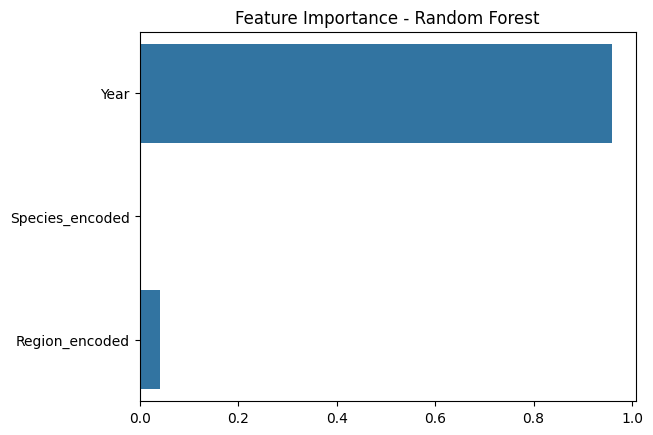

In [28]:
import seaborn as sns 
importances = rf.feature_importances_
features = ['Year', 'Species_encoded', 'Region_encoded']
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


 Interactive Visualization (Plotly):

In [43]:
import plotly.express as px

fig = px.line(df, x='Year', y='Population', color='Species', title='Population Trends')
fig.show()


 A. Polynomial Regression (Capture Curved Trends)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assume df is already defined and preprocessed
# Encode categorical variables
df['Species_encoded'] = le_species.transform(df['Species'])
df['Region_encoded'] = le_region.transform(df['Region'])

# Prepare features and target
X = df[['Year', 'Species_encoded', 'Region_encoded']]
y = df['Population']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

# Evaluation
print("Polynomial Regression R² Score:", r2_score(y_test, y_poly_pred))


Polynomial Regression R² Score: 0.3780154305098561


 B. Hyperparameter Tuning with Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': None, 'n_estimators': 100}


 C. Forecasting with ARIMA (Alternative to LSTM for Univariate Time Series)

In [48]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Ensure your 'Year' column is int and sorted
df['Year'] = df['Year'].astype(int)

# Get unique species
species_list = df['Species'].unique()

# Store forecasts
all_forecasts = {}

for species in species_list:
    try:
        # Filter and prepare data
        species_df = df[df['Species'] == species]
        grouped = species_df.groupby('Year').sum().sort_index()
        
        # Skip if too few years
        if len(grouped) < 6:
            print(f"⏭️ Skipping {species} (not enough data)")
            continue
        
        # Set datetime index with frequency
        grouped.index = pd.to_datetime(grouped.index, format='%Y')
        grouped.index.freq = 'YS'

        # Fit ARIMA model
        model = ARIMA(grouped['Population'], order=(2, 1, 2))
        model_fit = model.fit()

        # Forecast next 5 years
        forecast = model_fit.forecast(steps=5)
        forecast.index = pd.date_range(start=grouped.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')
        
        # Store result
        all_forecasts[species] = forecast
        
        # Print forecast
        print(f"\n📈 Forecast for {species} (next 5 years):")
        print(forecast)

    except Exception as e:
        print(f"❌ Error for {species}: {e}")


❌ Error for African Elephant: LU decomposition error.

📈 Forecast for Bengal Tiger (next 5 years):
2024-01-01    6532.510366
2025-01-01    6599.256328
2026-01-01    6582.538344
2027-01-01    6606.012307
2028-01-01    6589.164384
Freq: YS-JAN, Name: predicted_mean, dtype: float64

📈 Forecast for Giant Panda (next 5 years):
2024-01-01    10296.528023
2025-01-01    10097.656157
2026-01-01    10016.452462
2027-01-01    10297.503377
2028-01-01    10068.136123
Freq: YS-JAN, Name: predicted_mean, dtype: float64

📈 Forecast for Snow Leopard (next 5 years):
2024-01-01    6237.466907
2025-01-01    6299.209153
2026-01-01    6233.827217
2027-01-01    6291.488012
2028-01-01    6241.924509
Freq: YS-JAN, Name: predicted_mean, dtype: float64


D:\anaconda\envs\tensorflow31113\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.




📈 Forecast for Orangutan (next 5 years):
2024-01-01    5596.636165
2025-01-01    5433.845617
2026-01-01    5248.676401
2027-01-01    5480.725633
2028-01-01    5544.002489
Freq: YS-JAN, Name: predicted_mean, dtype: float64


D:\anaconda\envs\tensorflow31113\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 D. Saving and Loading Models

In [49]:
import joblib

# Save
joblib.dump(rf, "random_forest_model.pkl")

# Load
rf_loaded = joblib.load("random_forest_model.pkl")


 E. Logging with TensorBoard (for LSTM training)

In [50]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.callbacks import TensorBoard

log_dir = "logs/"
tensorboard = TensorBoard(log_dir=log_dir)

lstm_model = Sequential([
    Input(shape=(seq_len, 1)),
    LSTM(64, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_seq, y_seq, epochs=50, callbacks=[tensorboard])


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3037
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 0.2934
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2836
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2740
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2646
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.2553
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.2461
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.2372
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2285
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.2199
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2113
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2028
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.1944
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1860
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.1777
Epoch 16/50
1/1 ━━━━━━━━━

 F. Evaluation Summary Table (for model comparison)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Train models
lr = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)],
    "MAE": [mae_lr, mae_rf, mae_xgb],
}

pd.DataFrame(results)


,Model,R2,MAE
0,Linear Regression,0.197676,1203.183308
1,Random Forest,0.921426,372.698750
2,XGBoost,0.921108,334.707245


In [55]:
import os 
os.getcwd()

'C:\\Users\\praga\\mininew wildlife prediction'